In [1]:
import sys, os, tempfile
import numpy as np
%matplotlib inline
%gui qt
import matplotlib.pyplot as plt
import qcodes

from qcodes.data.data_set import DataSet
import qtt
from qtt.measurements.scans import scanjob_t

from qtt.dataset_processing import slice_dataset

In [2]:
from qcodes.plots.qcmatplotlib import MatPlot

def plot_dataset(dataset: DataSet) -> None:
    """ Plot a dataset to matplotlib figure window

    Args:
        dataset: DataSet to be plotted
        scanjob: scanjob of the measurement
        save: Select if you want to save the plots

    """
    
    parameter_names = [name for name in dataset.arrays.keys() if not dataset.arrays[name].is_setpoint]
    #default_array = dataset.default_parameter_array()
    
    last_key = list(dataset.arrays.keys())[-1]
    default_array = dataset.arrays[last_key]
    
    # 2D plots
    if len(default_array.shape) >= 2:
        for idx, parameter_name in enumerate(parameter_names):
                plot_handle = MatPlot(dataset.arrays[parameter_name], num=idx)
                plot_handle.rescale_axis()


    # 1D plots        
    else:
        for idx, parameter_name in enumerate(parameter_names):
            plot_handle = MatPlot(dataset.arrays[parameter_name], num=idx)
            plot_handle.rescale_axis()

In [3]:
# set data directory
path_save = r'K:\Yona\Measurements'
datadir = os.path.join(path_save, '20210224_10721_S22_TopRight_device')
DataSet.default_io = qcodes.data.io.DiskIO(datadir)

In [4]:
logviewer = qtt.gui.dataviewer.DataViewer(data_directory=datadir, verbose=1)

findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 0.0%
findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 47.9%
findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 65.6%
findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 86.3%
findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 91.5%
findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 96.9%
findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 39.0%
findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 60.6%
findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 87.8%
findfilesR: K:\Yona\Measurements\20210224_10721_S22_TopRight_device: 94.8%
DataViewer: found 368 files


Fetch the active dataset from the viewer

In [7]:
dataset = logviewer.dataset
print( dataset )

DataSet:
   location = 'K:\\Yona\\Measurements\\20210224_10721_S22_TopRight_device\\2021-03-02\\13-06-20_qtt_Coulomb_Oscillation'
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | PM              | None         | (110,)
   Measured | dmm_curr_sensor | None         | (110,)


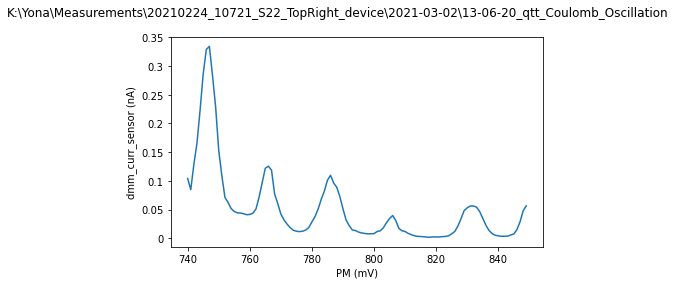

In [8]:
plot_dataset(dataset)

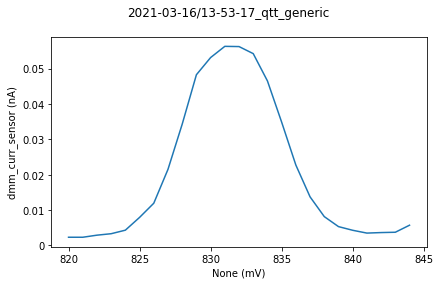

In [9]:
slice_data = slice_dataset(dataset, [820, 845], axis=0, copy_metadata=True, output_parameter_name='dmm_curr_sensor')
plot_dataset(slice_data)

In [12]:
import qtt.algorithms.coulomb
from qtt.algorithms.coulomb import analyseCoulombPeaks
from qtt.data import load_example_dataset

fitCoulombPeaks: peak 0: position 831.00 max 0.00 valid 1
filterPeaks: 1 -> 1 good peaks
peakScores: noise factor 0.46
peakScores: 0: height 0.0 halfwidth 3.4, score 0.00


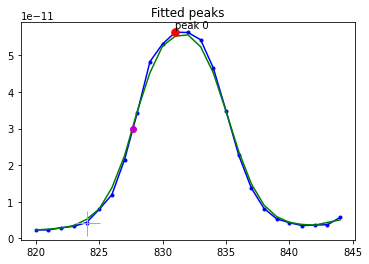

In [13]:
peaks = qtt.algorithms.coulomb.analyseCoulombPeaks(slice_data, fig=10)
_=plt.plot(peaks[0]['xbottom'], peaks[0]['ybottoml'], '+y', markersize=25)

In [15]:
peaks

[{'p': 7,
  'x': 747.0,
  'y': 3.34263652e-10,
  'gaussfit': array([7.46421056e+02, 3.42722321e+00, 2.67663941e-09]),
  'halfvaluelow': 1.6819515580975e-10,
  'height': 3.321369923805e-10,
  'valid': 1,
  'lowvalue': 2.1266596195e-12,
  'type': 'peak',
  'phalf0': 4,
  'phalfl': None,
  'xhalfl': 744.4301228811054,
  'xfoot': 743.2942872417522,
  'yhalfl': 2.500063395e-10,
  'pbottomlow': 0,
  'pbottom': 1,
  'pbottoml': 1,
  'xbottom': 741.0,
  'xbottoml': 741.0,
  'vbottom': 8.48223958e-11,
  'ybottoml': 8.48223958e-11,
  'score': 3.9688734239899314e-10,
  'slope': 2.8585727149756123e-11,
  'heightscore': 0.7744393592254162,
  'scorerelative': 1.2322146857924403,
  'noisefactor': 0.8323105648884057},
 {'p': 91,
  'x': 831.0,
  'y': 5.63016354e-11,
  'gaussfit': array([8.31531115e+02, 3.32073948e+00, 4.90778566e-10]),
  'halfvaluelow': 2.921414750975e-11,
  'height': 5.41749757805e-11,
  'valid': 1,
  'lowvalue': 2.1266596195e-12,
  'type': 'peak',
  'phalf0': 87,
  'phalfl': None,
  

fitCoulombPeaks: peak 0: position 747.00 max 0.00 valid 1
fitCoulombPeaks: peak 1: position 766.00 max 0.00 valid 1
fitCoulombPeaks: peak 2: position 786.00 max 0.00 valid 1
fitCoulombPeaks: peak 3: position 806.00 max 0.00 valid 1
fitCoulombPeaks: peak 4: position 831.00 max 0.00 valid 1
fitCoulombPeaks: peak 5: position 849.00 max 0.00 valid 1
filterPeaks: 4 -> 2 good peaks
peakScores: noise factor 0.83
peakScores: 0: height 0.0 halfwidth 2.6, score 0.00
peakScores: 1: height 0.0 halfwidth 3.4, score 0.00


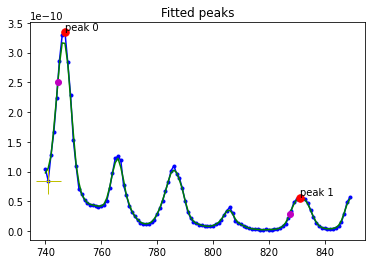

In [14]:
peaks = qtt.algorithms.coulomb.analyseCoulombPeaks(dataset, fig=10)
_=plt.plot(peaks[0]['xbottom'], peaks[0]['ybottoml'], '+y', markersize=25)

In [60]:
peaks[0]

[{'p': 7,
  'x': 747.0,
  'y': 3.34263652e-10,
  'gaussfit': array([7.46421056e+02, 3.42722321e+00, 2.67663941e-09]),
  'halfvaluelow': 1.6819515580975e-10,
  'height': 3.321369923805e-10,
  'valid': 1,
  'lowvalue': 2.1266596195e-12,
  'type': 'peak',
  'phalf0': 4,
  'phalfl': None,
  'xhalfl': 744.4301228811054,
  'xfoot': 743.2942872417522,
  'yhalfl': 2.500063395e-10,
  'pbottomlow': 0,
  'pbottom': 1,
  'pbottoml': 1,
  'xbottom': 741.0,
  'xbottoml': 741.0,
  'vbottom': 8.48223958e-11,
  'ybottoml': 8.48223958e-11,
  'score': 3.9688734239899314e-10,
  'slope': 2.8585727149756123e-11,
  'heightscore': 0.7744393592254162,
  'scorerelative': 1.2322146857924403,
  'noisefactor': 0.8323105648884057},
 {'p': 91,
  'x': 831.0,
  'y': 5.63016354e-11,
  'gaussfit': array([8.31531115e+02, 3.32073948e+00, 4.90778566e-10]),
  'halfvaluelow': 2.921414750975e-11,
  'height': 5.41749757805e-11,
  'valid': 1,
  'lowvalue': 2.1266596195e-12,
  'type': 'peak',
  'phalf0': 87,
  'phalfl': None,
  

In [57]:
peaks[1]

{'p': 91,
 'x': 831.0,
 'y': 5.63016354e-11,
 'gaussfit': array([8.31531115e+02, 3.32073948e+00, 4.90778566e-10]),
 'halfvaluelow': 2.921414750975e-11,
 'height': 5.41749757805e-11,
 'valid': 1,
 'lowvalue': 2.1266596195e-12,
 'type': 'peak',
 'phalf0': 87,
 'phalfl': None,
 'xhalfl': 827.5910224768656,
 'xfoot': 792.0,
 'yhalfl': 2.9059603005000043e-11,
 'pbottomlow': 77,
 'pbottom': 84,
 'pbottoml': 84,
 'xbottom': 824.0,
 'xbottoml': 824.0,
 'vbottom': 4.29755343e-12,
 'ybottoml': 4.29755343e-12,
 'score': 7.756606628697522e-11,
 'slope': 7.122521303404966e-12,
 'heightscore': 0.16145688380298023,
 'scorerelative': 0.24081908337070526,
 'noisefactor': 0.8323105648884057}